# Statistiques descriptives

## Données chargées des fichiers précédents du GitHub sur la fréquentation du métro sans les JO

Insérer les liens des différents fichiers csv

### Analyse de la ligne 1

#### 1ère étape : chargement des données 

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

Il convient ici de ne pas répéter la ligne de code suivante sans quoi Python n'arrive plus à retrouver la page

In [15]:
# URL raw du fichier CSV sur GitHub
url = 'https://raw.githubusercontent.com/saraht2000/metro-JO/main/ligne_numero_1.csv?token=GHSAT0AAAAAACKXSQ6ZVXUOLAWESC2JUVL4ZMLMYOA'

In [16]:
# Charger le fichier CSV dans un DataFrame pandas
df = pd.read_csv(url)

# Afficher les premières lignes du DataFrame pour vérification
print(df.head())

          Station  00:00-01:00  01:00-02:00  02:00-03:00  03:00-04:00  \
0      la defense         7.07         1.51         0.01         0.00   
1  hotel de ville        12.16         4.87         0.09         0.01   
2    palais-royal         9.30         2.52         0.09         0.00   
3        concorde        10.30         2.87         0.08         0.04   
4       argentine         6.64         2.50         0.16         0.00   

   04:00-05:00  05:00-06:00  06:00-07:00  07:00-08:00  08:00-09:00  ...  \
0         0.92         7.37        15.51        32.98        57.04  ...   
1         0.00         1.58         2.33         4.42         9.79  ...   
2         0.00         1.09         1.31         2.67         5.65  ...   
3         0.02         2.15         1.53         3.05         5.02  ...   
4         0.00         2.29         5.23        11.44        28.23  ...   

   17:00-18:00  18:00-19:00  19:00-20:00  20:00-21:00  21:00-22:00  \
0       103.14       108.83        84.18

#### 2nde étape : Nettoyer les tableaux afin de faire apparaître les données nécessaires 

In [17]:
# Sélectionner les colonnes à exclure
columns_to_exclude = ['moyenne_NB_VALD_hebdo_période_jo_2022_par_ligne',
                      'moyenne_NB_VALD_hebdo_période_jo_2022_par_ligne_par_direction',
                      'nombre_validations_totales_pour_la_ligne',
                      'Station']

# Sélectionner toutes les colonnes sauf celles à exclure
data = df.drop(columns=columns_to_exclude)

# Ajouter une colonne 'Total' contenant la somme des personnes pour chaque station
df['Total'] = data.sum(axis=1)

# Grouper par station pour obtenir la somme totale par station
sum_by_station = df.groupby('Station')['Total'].sum().sort_values(ascending=False)

#### 3ème étape : production du graphique 

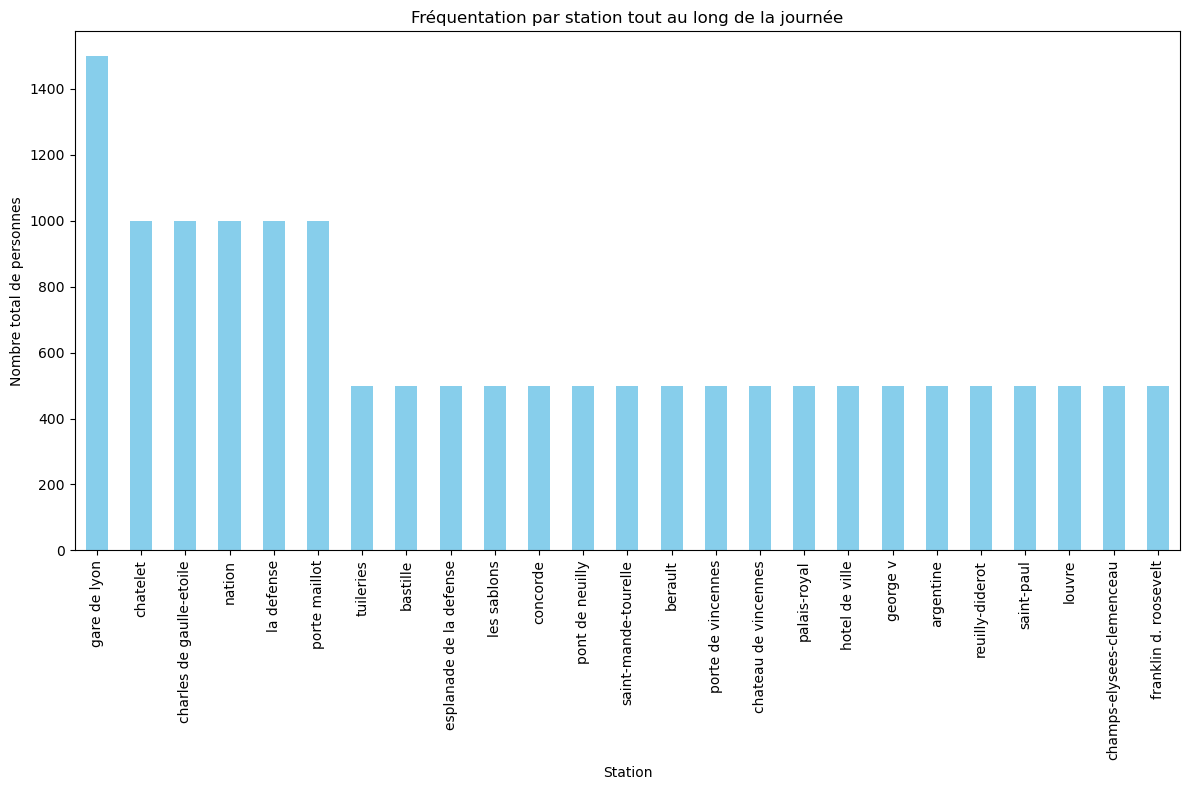

In [18]:
# Créer un graphique à barres pour la fréquentation par station
plt.figure(figsize=(12, 8))
sum_by_station.plot(kind='bar', color='skyblue')
plt.xlabel('Station')
plt.ylabel('Nombre total de personnes')
plt.title('Fréquentation par station tout au long de la journée')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()